In [1]:
import torch
import torch.nn as nn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## Steps
0) Collect data
1) Model
2) Loss
3) Optimizer
4) Training loop

### 0. Collect data

In [2]:
X_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=25, random_state=2)

# Convert to tensor
X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))

# # Reshaping for outputs into rank 2 tensor
y = y.reshape(y_np.shape[0],1)


In [3]:
n_samples, n_features = X.shape

### 1. Model

In [4]:
class LinearRegression(nn.Module):
    def __init__(self, n_features):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(in_features = n_features, out_features = 1)
        self.optim = None
        self.loss_obj = None
    
    def forward(self, x):
        return(self.linear(x))

    def loss_func(self, loss_func = nn.MSELoss):
        self.loss_obj = loss_func()             # Object of the loss function in torch.nn 

    def optimizer(self, optimizer, learning_rate):
        self.optim = optimizer(self.linear.parameters(),lr = learning_rate)

    
    def train_model(self, X, y, epochs = 100, print_statements = False):
        for epoch in range(epochs):
            y_pred = self.forward(X)            # Forward prop
            loss = self.loss_obj(y_pred,y)      # Compute loss
            loss.backward()                     # Compute local gradients
            self.optim.step()                   # Update parameters
            self.optim.zero_grad()              # Zero the gradients
            if(print_statements and epoch%(epochs//10)==0):
                print(f'Epoch {epoch+1}; Loss = {loss:0.4f}')

In [5]:
predict = LinearRegression(n_features)

### 2,3. Loss and Optimizer

In [47]:
predict.loss_func()
predict.optimizer(torch.optim.SGD, learning_rate=0.01)

### 4. Training loop

In [48]:
predict.train_model(X,y)

### 5. Check Predictions

In [52]:
y_predicted = predict.forward(X).detach().numpy()

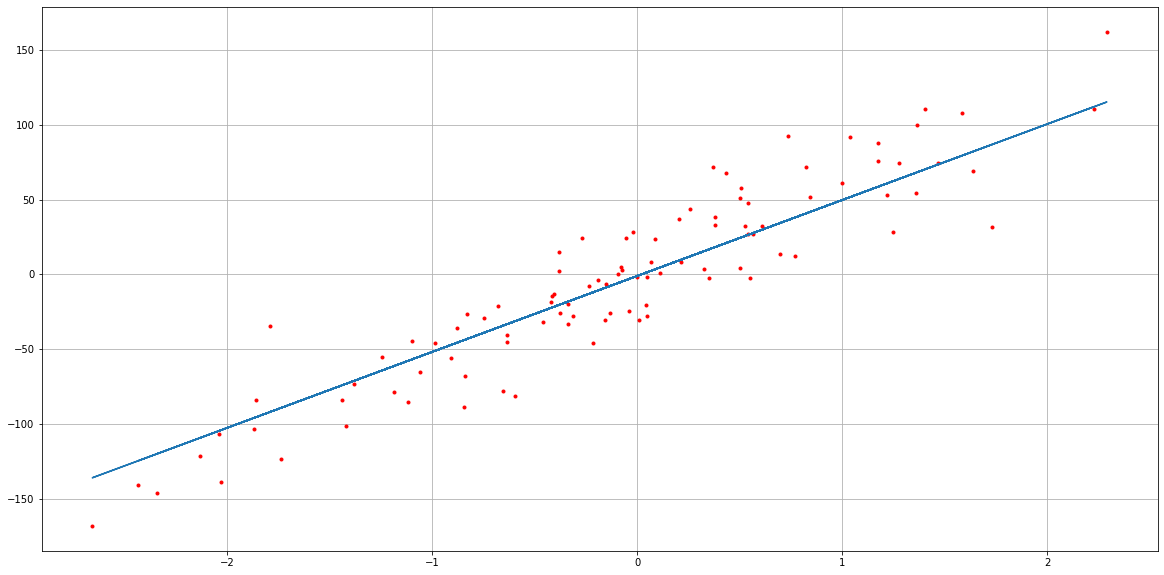

In [55]:
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(X_np,y_np,'r.')
plt.plot(X_np,y_predicted)

In [56]:
torch.save(predict,'models/linear_regressor.pt')